# Loan Default Prediction
Author: Alice Zhou

Machine learning techniques are increasingly being used in the loan default prediction. When constructing a predictive model, it is important to use different methods to improve the model performance and therefore decrease the costs of loan default detection. 
- Objectives: This report uses a hypothetical loan dataset for loan default prediction. By using supervised machine learning (GLM and AutoML), different methods (inlcuding feature engineering, sampling methods, and hyper-parameters tuning) will be tested to improve the model performance. 
- Dataset: The dataset contains information on loan application details, borrower's credit history from Credit Bureau, borrower's financial query records, borrower's call records, and third-party data. 

# Table of Contents
- [1. Data Preparation](#1)
- [2. GLM (Generalized Linear Model)](#2)
    - [2.1 Build Model (Raw Variables)](#21)
        - [2.1.1 Model Performance: AUC=0.68, PR=0.3315, lift(for 1st decile)=1.48](#211)
        - [2.1.2 Variable Importance](#212)
    - [2.2 Feature Engineering](#22)
        - [2.2.1 Feature Selection](#221)
            - [2.2.1.1 Iterate Model](#2211)
            - [2.2.1.2 Model Performance: AUC=0.68, PR=0.3315, lift(for 1st decile)=1.48](#2212)
        - [2.2.2 WOE Transformation](#222)
            - [2.2.2.1 Iterate Model](#2221)
            - [2.2.2.2 Model Performance: AUC=0.71, PR=0.4380, lift(for 1st decile)=2.30](#2222)
    - [2.3 Hyperparameter Tuning](#23)
        - [2.3.1 Regularization](#231)
            - [2.3.1.1 Iterate Model](#2311)
            - [2.3.1.2 Model Performance: AUC=0.71, PR=0.4380, lift(for 1st decile)=2.31](#2312)
        - [2.3.2 alpha & lamda](#232)
            - [2.3.2.1 Iterate Model](#2321)
            - [2.3.2.2 Model Performance: AUC=0.71, PR=0.4380, lift(for 1st decile)=2.29](#2322)
    - [2.4 Oversampling](#24)
        - [2.4.1 Iterate Model](#241)
        - [2.4.2 Model Performance: AUC=0.71, PR=0.4397, lift(for 1st decile)=2.73](#242)
- [3. AutoML (Automated Machine Learning) ](#3)
    - [3.1 Build Model (Raw Variables)](#31)
        - [3.1.1 Model Performance](#311)
        - [3.1.2 Variable Importance: AUC=0.69, PR=0.3334, lift(for 1st decile)=2.04](#312)
    - [3.2 Feature Engineering](#32)
        - [3.2.1 Iterate Model](#321)
        - [3.2.2 Model Performance: AUC=0.79, PR=0.4988, lift(for 1st decile)=2.92](#322)
    - [3.3 Hyperparameter Tuning (max_models, stopping_metric, nfolds, balance_classes)](#33)
        - [3.3.1 Iterate Model](#331)
        - [3.3.2 Model Performance: AUC=0.79, PR=0.4999, lift(for 1st decile)=2.92](#332)
- [4. Conclusion](#4)

## 1. Data Preparation <a class="anchor" id="1"></a>

In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/Users/alicezhou/Documents/Columbia/5420 Anomaly Detection/10. Supervised Machine Learning Techniques II/Assignment10/'
df = pd.read_csv(path + 'XYZloan_default_selected_vars.csv') 

Some basic understandings of the raw data:
- Each raw is a borrower (id), and the other variables are the information related to this borrower.
- For the loan default predictive model, "loan_default" is the target variable.
- There are more than 80 variables that can be used as input variables.

In [3]:
# Get the Simple Summary Statistics 
df.describe() 

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


From the variable statistics, we can see that there are some special values (eg. -99) in some variables (eg. CD172, CD173). I will investigate what other special values and create categories to distinct them later. 

In [4]:
# Train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.40, random_state=42)

In [5]:
train.shape

(48000, 89)

In [6]:
# Categorize the variables' data source
var = pd.DataFrame(train.dtypes).reset_index()
var.columns = ['varname','dtype'] 
var['source'] = var['varname'].str[:2]
var.head(10)

,varname,dtype,source
0,Unnamed: 0.1,int64,Un
1,Unnamed: 0,int64,Un
2,id,int64,id
3,loan_default,int64,lo
4,AP001,int64,AP
5,AP002,int64,AP
6,AP003,int64,AP
7,AP004,int64,AP
8,AP005,object,AP
9,AP006,object,AP


In [7]:
# Investigate variables' data type 
var['dtype'].value_counts()

float64    58
int64      28
object      3
Name: dtype, dtype: int64

In [8]:
# There are 3 categorical variables, and the other are numeric variables
var[var['dtype']=='object']

,varname,dtype,source
8,AP005,object,AP
9,AP006,object,AP
88,MB007,object,MB


In [9]:
# Summarize the data source
var['source'].value_counts()

CD    36
TD    24
AP     9
CR     8
PA     6
Un     2
MB     2
id     1
lo     1
Name: source, dtype: int64

In [10]:
# "AP005" is dropped since it's a timestamp data, which cannot be employed in tree-based methods
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[(var['source']=='AP') & (var['varname']!='AP005')]['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])
AP_list

['AP001', 'AP002', 'AP003', 'AP004', 'AP006', 'AP007', 'AP008', 'AP009']

In [11]:
# Distribution of bad (1) and good (0) loans
train['loan_default'].value_counts(dropna=False)

0    38736
1     9264
Name: loan_default, dtype: int64

It is clearly that target variable (loan_default) has very imbalanced distribution, which will be considered for model tuning later.

In [12]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "20" 2023-03-21; Java(TM) SE Runtime Environment (build 20+36-2344); Java HotSpot(TM) 64-Bit Server VM (build 20+36-2344, mixed mode, sharing)
  Starting server from /Users/alicezhou/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/94/_mqchpnd0kv5pd779q9n49jh0000gn/T/tmpsuy1ah8z
  JVM stdout: /var/folders/94/_mqchpnd0kv5pd779q9n49jh0000gn/T/tmpsuy1ah8z/h2o_alicezhou_started_from_python.out
  JVM stderr: /var/folders/94/_mqchpnd0kv5pd779q9n49jh0000gn/T/tmpsuy1ah8z/h2o_alicezhou_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month and 13 days
H2O_cluster_name:,H2O_from_python_alicezhou_iipq5y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


## 2. GLM (Generalized Linear Model) <a class="anchor" id="2"></a>

GLM (Generalized Linear Model) can be suitable for a loan prediction project for several reasons:

1. Interpretability: GLM provides a straightforward and interpretable model representation. This is essential for a loan prediction project where the ability to understand and explain the factors influencing the loan approval decision is crucial for stakeholders and regulatory compliance.

2. Efficiency: GLM is computationally efficient and can handle large datasets with many features, making it practical for real-world loan prediction scenarios that involve a significant amount of data.

3. Feature Importance: GLM allows for easy identification of significant features and their impact on the loan prediction. This information helps lenders and risk analysts understand the key factors driving loan approval decisions.

4. Regularization: GLM can incorporate regularization techniques like Lasso (L1) or Ridge (L2) regularization, which helps prevent overfitting and improves generalization performance.

5. Binary Classification: Loan default prediction is typically a binary classification problem (default or non-default). GLM can handle binary outcomes naturally using appropriate link functions like the logistic link function.

6. Assumptions Clarity: GLM relies on fewer assumptions compared to some other models, such as linear regression. This makes it more robust and suitable for cases where data may not perfectly meet certain distributional assumptions.

7. Model Evaluation: GLM allows for easy model evaluation using standard statistical measures like AIC, BIC, and likelihood ratio tests, helping assess model fit and performance.

While GLM has its advantages, the choice of the modeling technique ultimately depends on the specific characteristics of the data and the project goals. 

For the modeling part, I will run with a small sample dataset first, and then try to write repeating code in a function. 

In [13]:
target='loan_default'
predictors = CR_list + TD_list + AP_list + MB_list + CR_list + PA_list 

In [14]:
# Sample 10% of the original train and test datasets 
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)

# Convert sampled DataFrames into H2OFrame objects
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
# Build GLM model for sample data
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_v1 = H2OGeneralizedLinearEstimator(model_id = 'glm_v1',
                                       family= "binomial",
                                       lambda_ = 0,
                                       compute_p_values = True,
                                       seed=1234)
glm_v1.train(predictors, target, training_frame= train_hex)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_v1


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    binomial  logit   None              74                            74                             9                       Key_Frame__upload_b95da121a8e0d9a35214e17f3ace458c.hex

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1407604752382271
RMSE: 0.3751805901672248
LogLoss: 0.44462645556813896
AUC: 0.6965269585062099
AUCPR: 0.3474813850239752
Gini: 0.3930539170124199
Null degrees of freedom: 4799
Residual degrees of freedom: 4725
Null deviance: 4638.604507002493
Residual deviance: 4268.413973454134
AIC: 4418.413973454134

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19276060431234598
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      2566  1332  0.3417   (1332.0/3898.0)
1      318   584   0.3525   (318.0/902.0)
Total  2884  1916  0.3438   (1650.0/4800.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.192761     0.414478  225
max f2                       0.131917     0.571387  292
max f0point5                 0.287928     0.364611  138
max accuracy                 0.499534     0.816042  38
max precision                0.999993     1         0
max recall                   0.0306107    1         387
max specificity              0.999993     1         0
max absolute_mcc             0.192761     0.24388   225
max min_per_class_accuracy   0.191051     0.65136   227
max mean_per_class_accuracy  0.192761     0.652868  225
max tns                      0.999993     3898      0
max fns                      0.999993     899       0
max fps                      2.27725e-05  3898      399
max tps                      0.0306107    902       387
max tnr                      0.999993     1         0
max fnr                      0.999993     0.996674  0
max fpr                      2.27725e-05  1         399
max tpr                      0.0306107    1         387

Gains/Lift Table: Avg response rate: 18.79 %, avg score: 160.78 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.01                        62.8796            0.332594  0.332594           0.0625           130.97    0.0625                      130.97              0.00332594      0.00332594                 -66.7406   -66.7406           -0.00821844
2        0.02                        0.686347           1.77384   1.05322            0.333333         4.79867   0.197917                    67.8843             0.0177384       0.0210643                  77.3836    5.32151            0.00131058
3        0.03                        0.570297           1.55211   1.21951            0.291667         0.633762  0.229167                    45.4674             0.0155211       0.0365854                  55.2106    21.9512            0.00810922
4        0.04                        0.468563           1.21951   1.21951            0.229167         0.513069  0.229167                    34.2288             0.0121951       0.0487805                  21.9512    21.9512            0.010812

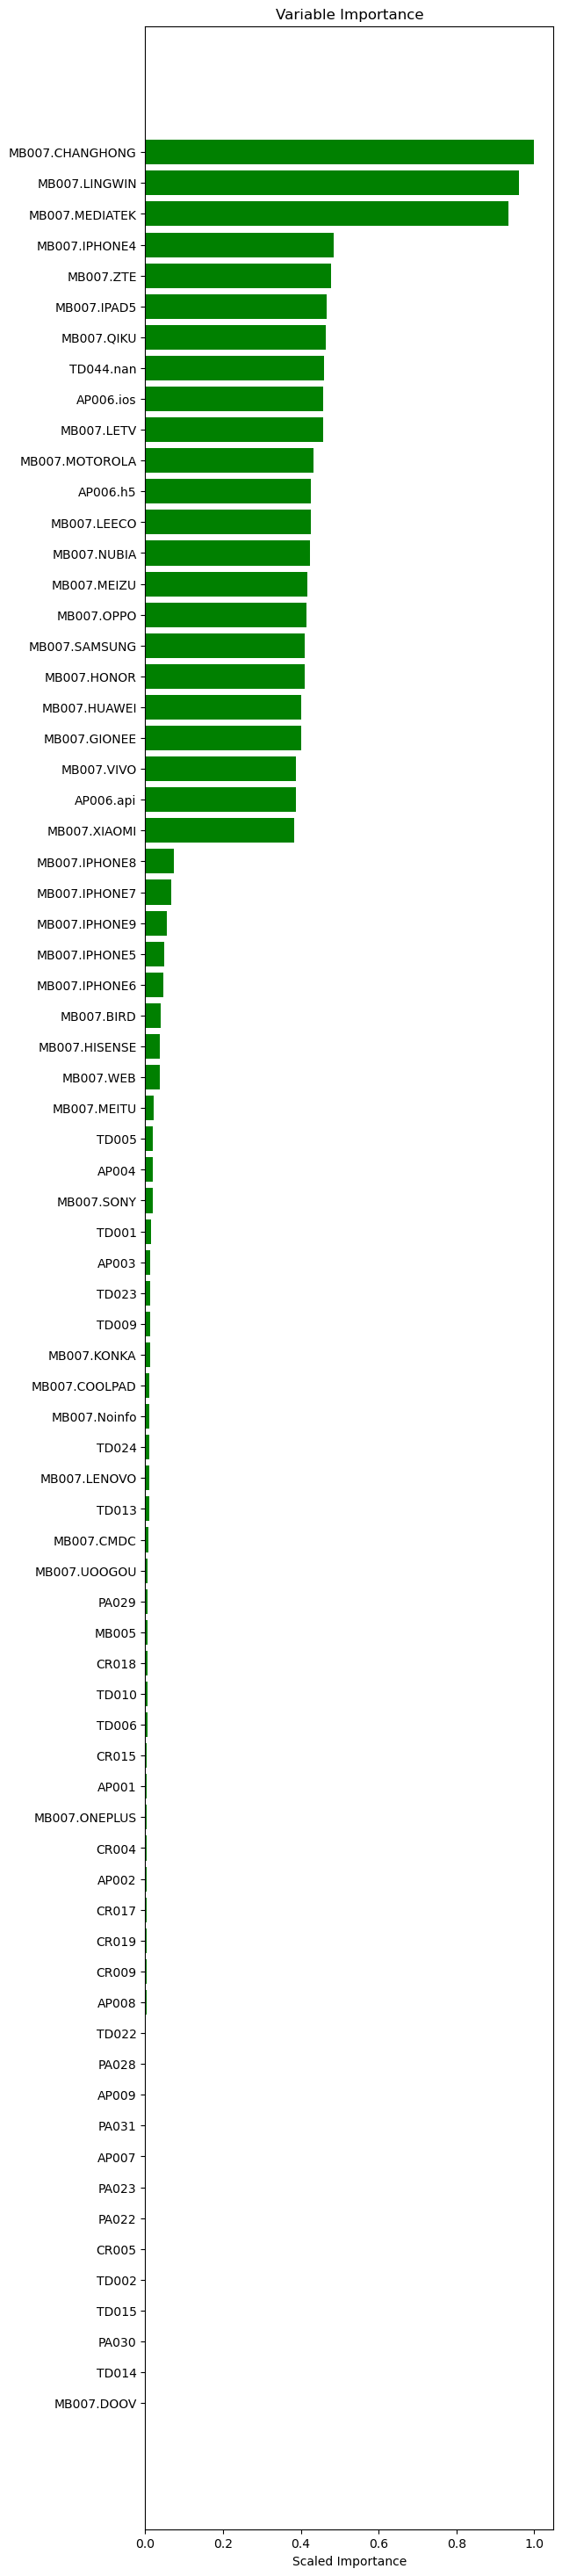

In [16]:
# Create a function to show the variable importance 
def VarImp(model_name):
    
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    
    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (6,len(variables)/2))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title('Variable Importance')
    plt.show()
    
VarImp(glm_v1)

In [17]:
# Comparison between model predictions and actual target values
predictions = glm_v1.predict(test_hex)
predictions.head()
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,loan_default,predict,p0,p1,StdErr
0,0,1,0.734329,0.265671,0.187731
1,0,0,0.861398,0.138602,0.223446
2,0,1,0.774078,0.225922,0.247177
3,0,1,0.803435,0.196565,0.193612
4,0,0,0.855893,0.144107,0.138807


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


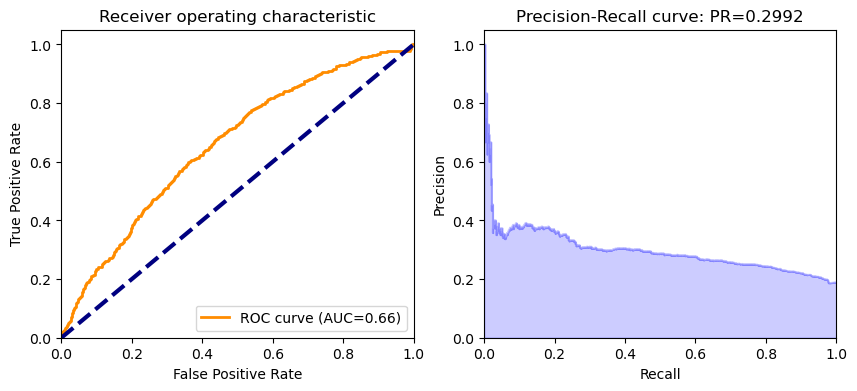

In [18]:
# Create a function to generate ROC and PR curve
def ROC_AUC(my_result, df, target):
    from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve
    import matplotlib.pyplot as plt

    # Get the probabilities for the positive class (class 1)
    y_actual = df[target].as_data_frame()
    y_pred_prob = my_result.predict(df).as_data_frame()['p1']  # Assuming the positive class probability column is named 'p1'

    # Convert probabilities to binary predictions (0 or 1)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_actual, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Compute Precision-Recall curve and PR value
    precision, recall, _ = precision_recall_curve(y_actual, y_pred_prob)
    average_precision = average_precision_score(y_actual, y_pred_prob)

    # Plotting
    plt.figure(figsize=(10, 4))
    # ROC
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC=%0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1, 2, 2)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

# Assuming 'glm_v1' is a binary classification model, and the target variable is 'loan_default'
ROC_AUC(glm_v1, test_hex, 'loan_default')

In [19]:
# Create a function to generate gains table and show the cumulative lift
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(glm_v1)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,96,224,320,96,224,0.16,0.09,60.0,1.60,7.0,30.00
1,320,99,221,640,195,445,0.32,0.17,120.0,1.62,15.0,30.47
2,320,78,242,960,273,687,0.46,0.26,180.0,1.52,20.0,28.44
3,320,81,239,1280,354,926,0.59,0.36,240.0,1.48,23.0,27.66
4,320,53,267,1600,407,1193,0.68,0.46,300.0,1.36,22.0,25.44
5,320,35,285,1920,442,1478,0.74,0.57,360.0,1.23,17.0,23.02
6,320,35,285,2240,477,1763,0.80,0.68,420.0,1.14,12.0,21.29
7,320,43,277,2560,520,2040,0.87,0.78,480.0,1.08,9.0,20.31
8,320,35,285,2880,555,2325,0.92,0.89,540.0,1.03,3.0,19.27


### 2.1 Build Model <a class="anchor" id="21"></a>

Now the code works fine with the small dataset, we can model with the entire dataset¶

In [20]:
# Convert entire train & test DataFrames into H2OFrame objects
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [21]:
# Build GLM model with all the original variables and default hyperparameters
glm_v2 = H2OGeneralizedLinearEstimator(model_id = 'glm_v2',
                                       family= "binomial",
                                       lambda_ = 0,
                                       compute_p_values = True,
                                       seed=1234)
glm_v2.train(predictors, target, training_frame= train_hex)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_v2


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    binomial  logit   None              133                           133                            7                       Key_Frame__upload_975ce20c465f603271b2c3911c8441bd.hex

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.14490925745288333
RMSE: 0.3806694858441944
LogLoss: 0.4550817700798361
AUC: 0.6876805780830549
AUCPR: 0.33578271887899014
Gini: 0.3753611561661099
Null degrees of freedom: 47999
Residual degrees of freedom: 47866
Null deviance: 47092.21173405356
Residual deviance: 43687.84992766426
AIC: 43955.84992766426

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19945980863645746
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      24934  13802  0.3563   (13802.0/38736.0)
1      3480   5784   0.3756   (3480.0/9264.0)
Total  28414  19586  0.36     (17282.0/48000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.19946      0.400971  231
max f2                       0.126473     0.574092  304
max f0point5                 0.27167      0.359081  168
max accuracy                 0.663357     0.807667  17
max precision                0.999944     1         0
max recall                   0.0142726    1         395
max specificity              0.999944     1         0
max absolute_mcc             0.212789     0.217276  218
max min_per_class_accuracy   0.197261     0.632124  233
max mean_per_class_accuracy  0.180834     0.635404  249
max tns                      0.999944     38736     0
max fns                      0.999944     9250      0
max fps                      0.000158514  38736     399
max tps                      0.0142726    9264      395
max tnr                      0.999944     1         0
max fnr                      0.999944     0.998489  0
max fpr                      0.000158514  1         399
max tpr                      0.0142726    1         395

Gains/Lift Table: Avg response rate: 19.30 %, avg score: 19.63 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.348769           0.982297  0.982297           0.189583         11.6142    0.189583                    11.6142             0.00982297      0.00982297                 -1.77029  -1.77029           -0.000219367
2        0.02                        0.22301            1.09024   1.03627            0.210417         0.283428   0.2                         5.94881             0.0109024       0.0207254                  9.02418   3.62694            0.000898871
3        0.03                        0.185089           1.24136   1.10463            0.239583         0.200509   0.213194                    4.03271             0.0124136       0.033139                   24.1364   10.4634            0.00388976
4        0.04                        0.153633           1.41408   1.18199            0.272917         0.166238   0.228125                    3.06609             0.0141408       0.0472798                  41.4076   18.19

#### 2.1.1 Model Performance <a class="anchor" id="211"></a>

In loan default prediction, the model's performance is evaluated using different metrics, such as AUC (Area Under the Receiver Operating Characteristic Curve), PR (Precision-Recall), and Gains Table.

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


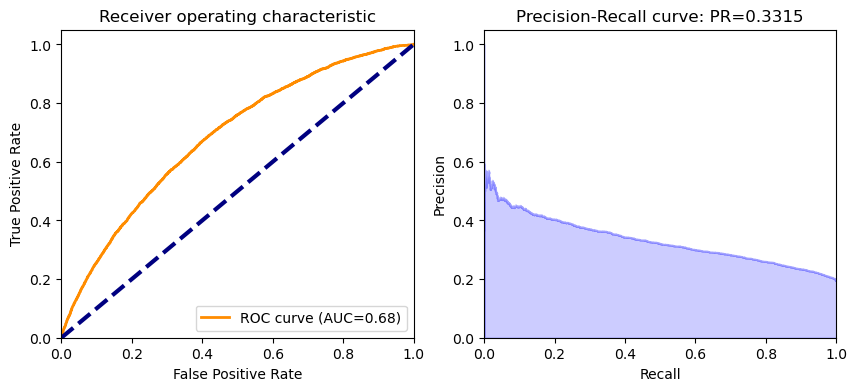

In [22]:
ROC_AUC(glm_v2,test_hex,'loan_default')

AUC (Area Under the Curve): AUC is a popular metric for evaluating binary classification models. It measures the model's ability to distinguish between positive and negative samples. An AUC value of 0.68 indicates that the model has moderate discriminatory power, but there is room for improvement. The AUC ranges from 0 to 1, where 0.5 represents random guessing, and 1 represents a perfect classifier.

PR (Precision-Recall): PR is another metric used for binary classification, especially when dealing with imbalanced datasets. It focuses on the trade-off between precision (positive predictive value) and recall (sensitivity or true positive rate). The PR value of 0.3315 indicates that the model's precision is relatively low compared to its recall. This means that while the model can identify a good proportion of actual loan defaults (high recall), it may also produce a considerable number of false positives (low precision).

In [23]:
createGains(glm_v2)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,921,2279,3200,921,2279,0.15,0.09,622.4,1.48,6.0,28.78
1,3200,940,2260,6400,1861,4539,0.30,0.18,1244.8,1.50,12.0,29.08
2,3200,911,2289,9600,2772,6828,0.45,0.26,1867.2,1.48,19.0,28.88
3,3200,991,2209,12800,3763,9037,0.60,0.35,2489.6,1.51,25.0,29.40
4,3200,484,2716,16000,4247,11753,0.68,0.46,3112.0,1.36,22.0,26.54
5,3200,440,2760,19200,4687,14513,0.75,0.56,3734.4,1.26,19.0,24.41
6,3200,370,2830,22400,5057,17343,0.81,0.67,4356.8,1.16,14.0,22.58
7,3200,379,2821,25600,5436,20164,0.87,0.78,4979.2,1.09,9.0,21.23
8,3200,402,2798,28800,5838,22962,0.94,0.89,5601.6,1.04,5.0,20.27


Gains Table:

The gains table provides additional insights into how the model performs across different deciles. A decile represents a grouping of samples based on their predicted probabilities. The gains table shows the cumulative count of actual and non-actual (predicted) loan defaults for each decile, along with various evaluation metrics.

Key Metrics in the Gains Table:

- Cumulative Actual: Cumulative count of actual loan defaults observed in each decile.
- Cumulative Non-Actual: Cumulative count of non-defaults observed in each decile.
- Percent Cumulative Actual: Percentage of cumulative actual loan defaults relative to the total number of actual loan defaults.
- Percent Cumulative Non-Actual: Percentage of cumulative non-defaults relative to the total number of non-defaults.
- Lift: Lift measures how many times better the model performs compared to a random model. It is calculated as the ratio of the percent cumulative actual to the percent cumulative non-actual.
- K-S: The Kolmogorov-Smirnov statistic measures the maximum distance between the cumulative distribution functions of the actual and non-actual groups. It is a measure of the model's discriminatory power.
- Gain: The gain is the cumulative percentage of actual loan defaults at each decile. It shows how much of the total default population is captured at each decile.

Interpretation:

From the gains table, we can observe the model's performance at different deciles. The higher the decile, the higher the predicted probabilities of loan default. The gain and lift metrics show how much better the model is performing compared to random selection at each decile. The K-S metric indicates the maximum difference in cumulative percentages between actual and non-actual groups.

Overall, the model seems to perform reasonably well in identifying loan defaults, especially in higher deciles, where the gain is relatively higher. However, there is still room for improvement, especially in terms of precision (PR) and discriminatory power (AUC). Further analysis and model tuning may help improve the model's performance.

#### 2.1.2 Variable Importance <a class="anchor" id="212"></a>

I am going to plot the variable importance for initial feature selection. 

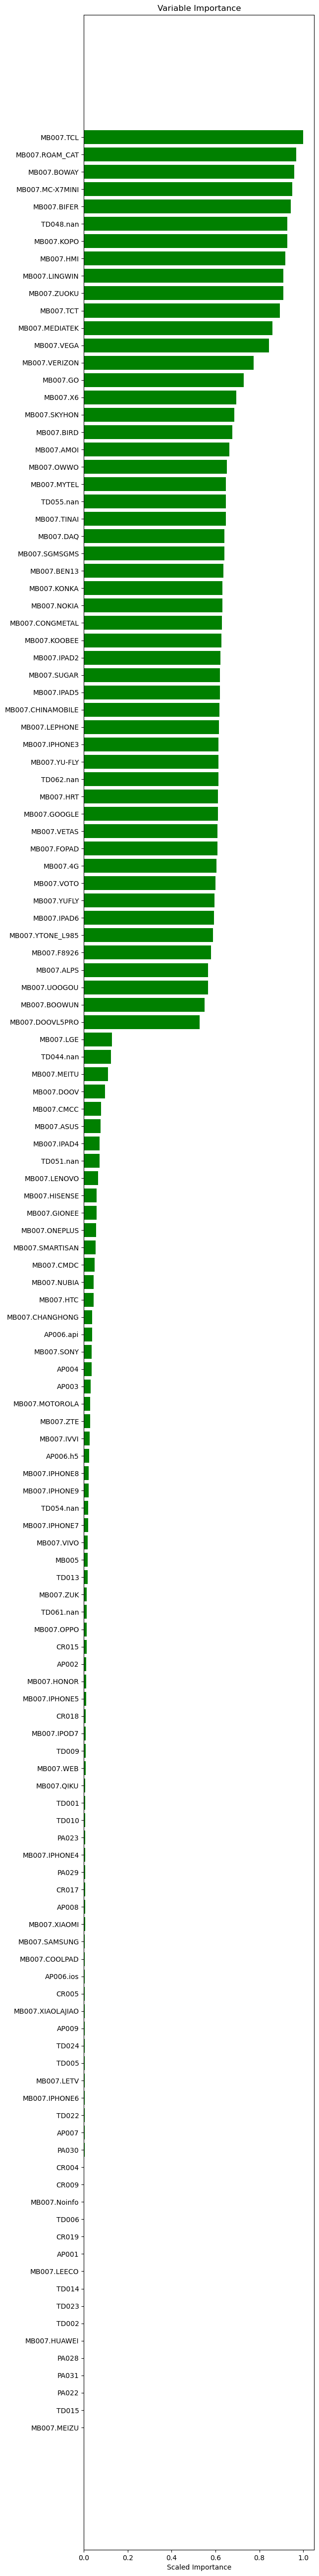

In [24]:
VarImp(glm_v2)

We can see that around 30 variables (excluding specific categories of the categorical variables) are shown significantly important to the model performance. My initial thought is to drop the less important variables and see whether it can improve model performance.

### 2.2 Feature Engineering <a class="anchor" id="22"></a>

#### 2.2.1 Feature Selection <a class="anchor" id="221"></a>

In [25]:
# Build a dataframe to show the variables importance 
varimportance_df=glm_v2._model_json['output']['variable_importances'].as_data_frame()
varimportance_df

,variable,relative_importance,scaled_importance,percentage
0,MB007.TCL,11.763626,1.000000,2.614206e-02
1,MB007.ROAM_CAT,11.375847,0.967036,2.528031e-02
2,MB007.BOWAY,11.271781,0.958189,2.504905e-02
3,MB007.MC-X7MINI,11.169862,0.949525,2.482255e-02
4,MB007.BIFER,11.084000,0.942226,2.463174e-02
...,...,...,...,...
128,PA028,0.002824,0.000240,6.274673e-06
129,PA031,0.002775,0.000236,6.165967e-06
130,PA022,0.001742,0.000148,3.871684e-06
131,TD015,0.001238,0.000105,2.750463e-06


In [26]:
import re

# Select those most significantly important variables as predictors 
# Extract these variable names without categories
predictors2 = [re.sub(r'\..*', '', var) for var in varimportance_df[varimportance_df['scaled_importance']>0]['variable']]
predictors2 = list(set(predictors2))

# Display the list of important variables
print(predictors2)

['TD009', 'TD005', 'TD061', 'AP007', 'PA029', 'TD022', 'AP001', 'CR009', 'CR004', 'TD023', 'CR018', 'CR005', 'PA031', 'TD044', 'PA030', 'PA022', 'TD054', 'CR019', 'TD048', 'TD001', 'AP006', 'TD006', 'TD055', 'AP004', 'TD013', 'MB007', 'CR015', 'TD014', 'PA023', 'TD002', 'PA028', 'TD015', 'AP009', 'MB005', 'TD051', 'AP008', 'TD024', 'CR017', 'TD062', 'AP003', 'AP002', 'TD010']


In [102]:
len(predictors2)

42

##### 2.2.1.1 Iterate Model <a class="anchor" id="2211"></a>

In [27]:
# Build GLM model with selected features
glm_v3 = H2OGeneralizedLinearEstimator(model_id = 'glm_v3',
                                       family= "binomial",
                                       lambda_ = 0,
                                       compute_p_values = True,
                                       seed=1234)
glm_v3.train(predictors2, target, training_frame= train_hex)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_v3


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    binomial  logit   None              133                           133                            7                       Key_Frame__upload_975ce20c465f603271b2c3911c8441bd.hex

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.14490925745288333
RMSE: 0.3806694858441944
LogLoss: 0.4550817700798361
AUC: 0.6876805780830549
AUCPR: 0.33578271887899014
Gini: 0.3753611561661099
Null degrees of freedom: 47999
Residual degrees of freedom: 47866
Null deviance: 47092.21173405356
Residual deviance: 43687.84992766426
AIC: 43955.84992766426

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19945980863645746
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      24934  13802  0.3563   (13802.0/38736.0)
1      3480   5784   0.3756   (3480.0/9264.0)
Total  28414  19586  0.36     (17282.0/48000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.19946      0.400971  231
max f2                       0.126473     0.574092  304
max f0point5                 0.27167      0.359081  168
max accuracy                 0.663357     0.807667  17
max precision                0.999944     1         0
max recall                   0.0142726    1         395
max specificity              0.999944     1         0
max absolute_mcc             0.212789     0.217276  218
max min_per_class_accuracy   0.197261     0.632124  233
max mean_per_class_accuracy  0.180834     0.635404  249
max tns                      0.999944     38736     0
max fns                      0.999944     9250      0
max fps                      0.000158514  38736     399
max tps                      0.0142726    9264      395
max tnr                      0.999944     1         0
max fnr                      0.999944     0.998489  0
max fpr                      0.000158514  1         399
max tpr                      0.0142726    1         395

Gains/Lift Table: Avg response rate: 19.30 %, avg score: 19.63 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.348769           0.982297  0.982297           0.189583         11.6142    0.189583                    11.6142             0.00982297      0.00982297                 -1.77029  -1.77029           -0.000219367
2        0.02                        0.22301            1.09024   1.03627            0.210417         0.283428   0.2                         5.94881             0.0109024       0.0207254                  9.02418   3.62694            0.000898871
3        0.03                        0.185089           1.24136   1.10463            0.239583         0.200509   0.213194                    4.03271             0.0124136       0.033139                   24.1364   10.4634            0.00388976
4        0.04                        0.153633           1.41408   1.18199            0.272917         0.166238   0.228125                    3.06609             0.0141408       0.0472798                  41.4076   18.19

##### 2.2.1.2 Model Performance <a class="anchor" id="2212"></a>

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


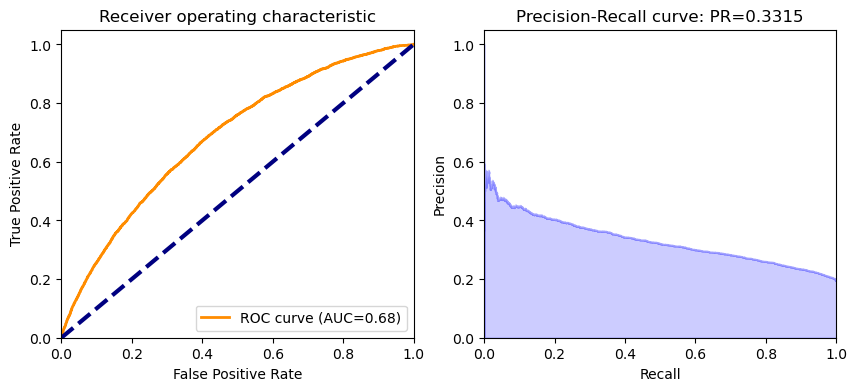

In [28]:
ROC_AUC(glm_v3,test_hex,'loan_default')

Both AUC (0.68) and PR (0.3315) are same as the previous model before feature selection. The model performance keeps the same by focusing on those most important variables.

In [29]:
createGains(glm_v3)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,921,2279,3200,921,2279,0.15,0.09,622.4,1.48,6.0,28.78
1,3200,940,2260,6400,1861,4539,0.30,0.18,1244.8,1.50,12.0,29.08
2,3200,911,2289,9600,2772,6828,0.45,0.26,1867.2,1.48,19.0,28.88
3,3200,991,2209,12800,3763,9037,0.60,0.35,2489.6,1.51,25.0,29.40
4,3200,484,2716,16000,4247,11753,0.68,0.46,3112.0,1.36,22.0,26.54
5,3200,440,2760,19200,4687,14513,0.75,0.56,3734.4,1.26,19.0,24.41
6,3200,370,2830,22400,5057,17343,0.81,0.67,4356.8,1.16,14.0,22.58
7,3200,379,2821,25600,5436,20164,0.87,0.78,4979.2,1.09,9.0,21.23
8,3200,402,2798,28800,5838,22962,0.94,0.89,5601.6,1.04,5.0,20.27


By comparing the cumulative lift between glm_v2 and glm_v3, they show the same performance, since most of the cumulative lifts are the same. The model performance keeps the same by focusing on those most important variables. To reduce the burden and increase the speed of model training process, I will only use these important variables for model iteration. 

#### 2.2.2 WOE Transformation <a class="anchor" id="222"></a>

Weight of evidence (WOE) transformation is a widely used technique in credit risk modeling or called the probability of default modeling (such models predict how capable an applicant can repay the loan). The goal of WOE transformation is to get the maximum difference among the binned categories relating to the target variable. In this transformation, the information of the target variable has been utilized. The dataset contains some categorical variables with many categories. These categories are distributed very differently are have various significant impact to the possibility of default as discussed above. Therefore, WOE is a good choice for feature engineering here.

Before jumping to WOE transformation, I will investigate the special values of numeric variables, including missing values (NA), '-99', '-98', '-1'.

In [30]:
# Check missing values
varmissing_df = df[predictors2].isnull().sum().to_frame(name='Missing Values').reset_index().rename(columns={'index': 'Variable'})
var_to_WOE1 =varmissing_df[varmissing_df['Missing Values']!=0]['Variable'].tolist()
var_to_WOE1

['TD061',
 'PA029',
 'TD022',
 'TD023',
 'PA031',
 'TD044',
 'PA030',
 'PA022',
 'TD054',
 'TD048',
 'TD055',
 'PA023',
 'PA028',
 'MB005',
 'TD051',
 'TD024',
 'TD062']

In [31]:
# Check whether minimum values cover negative values like '-99' 
df[predictors2].describe().loc['min']

TD009     0.0
TD005     0.0
TD061     2.0
AP007     1.0
PA029   -99.0
TD022    10.0
AP001    20.0
CR009     0.0
CR004     1.0
TD023     0.0
CR018     0.0
CR005     1.0
PA031   -99.0
TD044    20.0
PA030   -99.0
PA022   -99.0
TD054    60.0
CR019     1.0
TD048    60.0
TD001     0.0
TD006     0.0
TD055    30.0
AP004     3.0
TD013     0.0
CR015     2.0
TD014     0.0
PA023   -99.0
TD002     0.0
PA028   -99.0
TD015     0.0
AP009     0.0
MB005     0.0
TD051    20.0
AP008     1.0
TD024     0.0
CR017     1.0
TD062    30.0
AP003     1.0
AP002     1.0
TD010     0.0
Name: min, dtype: float64

‘-99’, '-98' and '-1' are very likely missing values and set by the systems as extreme values. In a parametric regression, we can not use them blindly as numeric values. I am going to bin the continuous variable, leaving the special values ‘-99’, '-98', ‘-1’, and’NA’ as their categories. These numeric variables will be converted to catogorical variables and I will then conduct WOE transformation for these catogorical variables for better capture their patterns.

In [32]:
# Check the other special variables
print(sum(df['PA023']==-99))
print(sum(df['PA023']==-98))
print(sum(df['PA023']==-1))
print(sum(df['PA023']<0))

1534
0
56004
57538


In [33]:
# Check the other special variables
print(sum(df['PA028']==-99))
print(sum(df['PA028']==-98))
print(sum(df['PA028']==-1))
print(sum(df['PA028']<0))

1534
50639
0
52173


I will include the categorical variables for future WOE transformation as well.

In [34]:
# Extract categorical variables
var_to_WOE_cat = var[var['dtype']=='object']['varname'].tolist()
var_to_WOE_cat

['AP005', 'AP006', 'MB007']

I will also include 'AP002' (CODE_GENDER) and 'AP003' (CODE_EDUCATION) for WOE transformation because these variables are also categorical information. 

In [35]:
var_to_WOE_num = var_to_WOE1 + ['AP002', 'AP003']
var_to_WOE_num

['TD061',
 'PA029',
 'TD022',
 'TD023',
 'PA031',
 'TD044',
 'PA030',
 'PA022',
 'TD054',
 'TD048',
 'TD055',
 'PA023',
 'PA028',
 'MB005',
 'TD051',
 'TD024',
 'TD062',
 'AP002',
 'AP003']

In [36]:
# Bin the continuous variable
def binning(df, var):
    # Check for missing values and replace with a default value if necessary
    df[var] = df[var].fillna("-999")

    # Convert the column to a numeric type (if it is not already)
    df[var] = pd.to_numeric(df[var], errors='coerce')

    # Check if the column contains NaN values after conversion
    if df[var].isnull().any():
        print(f"Warning: {var} contains NaN values after conversion. Check the data.")

    # Perform qcut on the numeric data
    if not df[var].empty:
        df[var + '_bin'] = pd.qcut(df[var], 10, duplicates='drop').values.add_categories("NoData")
        df[var + '_bin'] = df[var + '_bin'].fillna("NoData").astype(str)
        df[var + '_bin'].value_counts(dropna=False)
    
    # Handle specific values like -99, -98, and -1
    df.loc[df[var] == -999, var + '_bin'] = "NoData"
    df.loc[df[var] == -99, var + '_bin'] = -99
    df.loc[df[var] == -98, var + '_bin'] = -98
    df.loc[df[var] == -1, var + '_bin'] = -1

# Apply binning to train and test data
for i in var_to_WOE_num:
    binning(train, i)
    binning(test, i)

var_to_WOE_num_bin = [f + '_bin' for f in var_to_WOE_num]
features_bin = var_to_WOE_num_bin + list(var_to_WOE_cat)

Now variables are ready for WOE transformation.

In [37]:
# Calculate WOE for each category 
import category_encoders as ce

ec = ce.WOEEncoder()

def WOE(df, var):
    df[var] = df[var].fillna('NoData')
    X = df[var]
    y = df['loan_default']
    X_WOE = ec.fit(X, y)
    X_cleaned = ec.transform(X).round(2)
    df[var + '_WOE'] = X_cleaned 
    
for i in features_bin:
    WOE(train, i)  
    WOE(test, i)

In [38]:
# After WOE transformation, the original variables will be replaced by their WOE 
var_to_drop = var_to_WOE_num + var_to_WOE_cat
var_WOE = train.filter(like='_WOE').columns.tolist()

In [39]:
# Predictors will be the original variables without WOE transformation and new WOE variables
predictors3 = [x for x in predictors2 if x not in var_to_drop]
predictors3 = predictors3 + var_WOE
predictors3

['TD009',
 'TD005',
 'AP007',
 'AP001',
 'CR009',
 'CR004',
 'CR018',
 'CR005',
 'CR019',
 'TD001',
 'TD006',
 'AP004',
 'TD013',
 'CR015',
 'TD014',
 'TD002',
 'TD015',
 'AP009',
 'AP008',
 'CR017',
 'TD010',
 'TD061_bin_WOE',
 'PA029_bin_WOE',
 'TD022_bin_WOE',
 'TD023_bin_WOE',
 'PA031_bin_WOE',
 'TD044_bin_WOE',
 'PA030_bin_WOE',
 'PA022_bin_WOE',
 'TD054_bin_WOE',
 'TD048_bin_WOE',
 'TD055_bin_WOE',
 'PA023_bin_WOE',
 'PA028_bin_WOE',
 'MB005_bin_WOE',
 'TD051_bin_WOE',
 'TD024_bin_WOE',
 'TD062_bin_WOE',
 'AP002_bin_WOE',
 'AP003_bin_WOE',
 'AP005_WOE',
 'AP006_WOE',
 'MB007_WOE']

In [40]:
# Convert sampled DataFrames into H2OFrame objects
train_hex = h2o.H2OFrame(train)
test_hex = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


##### 2.2.2.1 Iterate Model <a class="anchor" id="2221"></a>

In [41]:
# Build GLM model with selected features after feature engineering 
glm_v4 = H2OGeneralizedLinearEstimator(model_id = 'glm_v4',
                                       family= "binomial",
                                       lambda_ = 0,
                                       compute_p_values = True,
                                       seed=1234)
glm_v4.train(predictors3, target, training_frame= train_hex)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_v4


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    binomial  logit   None              39                            39                             4                       Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13158533045585152
RMSE: 0.3627469234271347
LogLoss: 0.4242575769493438
AUC: 0.7276814916673444
AUCPR: 0.47920765773199436
Gini: 0.45536298333468883
Null degrees of freedom: 47999
Residual degrees of freedom: 47960
Null deviance: 47092.21173404879
Residual deviance: 40728.72738713701
AIC: 40808.72738713701

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27268365653369353
       0      1     Error    Rate
-----  -----  ----  -------  -----------------
0      33687  5049  0.1303   (5049.0/38736.0)
1      5184   4080  0.5596   (5184.0/9264.0)
Total  38871  9129  0.2132   (10233.0/48000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.272684     0.443647  203
max f2                       0.104127     0.575708  331
max f0point5                 0.411714     0.503694  143
max accuracy                 0.520905     0.831042  102
max precision                0.979112     1         0
max recall                   0.0146616    1         396
max specificity              0.979112     1         0
max absolute_mcc             0.403202     0.341198  147
max min_per_class_accuracy   0.170819     0.653389  270
max mean_per_class_accuracy  0.212126     0.66073   239
max tns                      0.979112     38736     0
max fns                      0.979112     9263      0
max fps                      0.00654649   38736     399
max tps                      0.0146616    9264      396
max tnr                      0.979112     1         0
max fnr                      0.979112     0.999892  0
max fpr                      0.00654649   1         399
max tpr                      0.0146616    1         396

Gains/Lift Table: Avg response rate: 19.30 %, avg score:  7.25 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.136053           1.54361   1.54361            0.297917         0.20652    0.297917                    0.20652             0.0154361       0.0154361                  54.361    54.361             0.00673618
2        0.02                        0.121191           1.33851   1.44106            0.258333         0.127263   0.278125                    0.166892            0.0133851       0.0288212                  33.8515   44.1062            0.0109309
3        0.03                        0.114124           1.04706   1.30973            0.202083         0.117156   0.252778                    0.150313            0.0104706       0.0392919                  4.70639   30.9729            0.0115141
4        0.04                        0.109321           1.29534   1.30613            0.25             0.111533   0.252083                    0.140618            0.0129534       0.0522453                  29.5337   30.6131       

##### 2.2.2.2 Model Performance <a class="anchor" id="2222"></a>

With the new feature engineering and WOE transformation, the model's performance has significantly improved compared to the previous model.

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


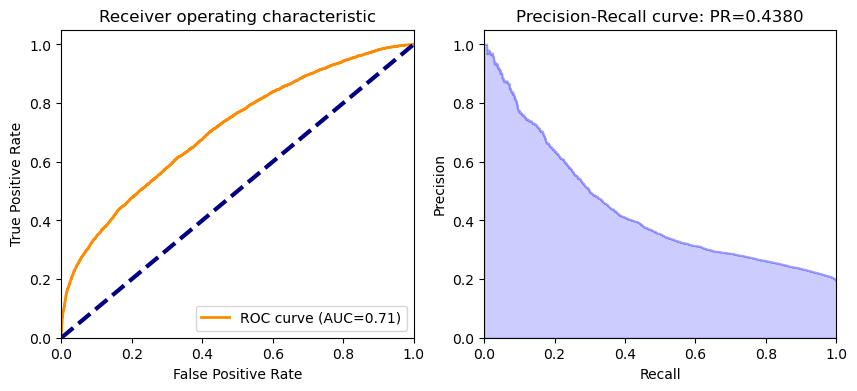

In [42]:
ROC_AUC(glm_v4,test_hex,'loan_default')

AUC (Area Under the Curve): The AUC value of 0.71 (0.71 > 0.68) indicates that the model's discriminatory power has substantially increased. A higher AUC value suggests that the model is better at distinguishing between positive and negative samples. An AUC of 0.71 means that the model's ability to correctly rank loan default probabilities is quite good.

PR (Precision-Recall): The PR value of 0.4380 (0.4380 > 0.3315) indicates that the model's precision-recall trade-off has also improved. The model is now achieving a higher precision while maintaining good recall. A PR value of 0.4380 suggests that the model is better at identifying actual loan defaults while reducing false positives.

In [43]:
createGains(glm_v4)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1430,1770,3200,1430,1770,0.23,0.07,622.4,2.30,16.0,44.69
1,3200,995,2205,6400,2425,3975,0.39,0.15,1244.8,1.95,24.0,37.89
2,3200,485,2715,9600,2910,6690,0.47,0.26,1867.2,1.56,21.0,30.31
3,3200,457,2743,12800,3367,9433,0.54,0.37,2489.6,1.35,17.0,26.30
4,3200,462,2738,16000,3829,12171,0.62,0.47,3112.0,1.23,15.0,23.93
5,3200,473,2727,19200,4302,14898,0.69,0.58,3734.4,1.15,11.0,22.41
6,3200,506,2694,22400,4808,17592,0.77,0.68,4356.8,1.10,9.0,21.46
7,3200,494,2706,25600,5302,20298,0.85,0.79,4979.2,1.06,6.0,20.71
8,3200,468,2732,28800,5770,23030,0.93,0.89,5601.6,1.03,4.0,20.03


Gains Table:
The gains table provides detailed insights into the model's performance at different deciles. Each decile represents a grouping of samples based on their predicted probabilities.

Interpretation:

The gains table shows that the new model significantly outperforms the previous one. The lift values are consistently higher, indicating that the model is performing much better than random guessing. The K-S values are also higher, showing improved discriminatory power between actual and non-actual groups.

Moreover, the gain values are higher across all deciles, indicating that the model is better at capturing loan defaults compared to the previous model. For example, at the 10th decile, the model captures 44.69% of the total defaults, whereas the previous model captured only 28.78% at the same decile.

Overall, the new model shows marked improvement in both AUC and PR, indicating that it has better predictive performance and is more effective in identifying loan defaults while maintaining higher precision. This model is likely to be more reliable for loan default prediction and can potentially help in making better lending decisions.

### 2.3 Hyperparameter Tuning <a class="anchor" id="23"></a>

Hyperparameter tuning is important for a GLM (Generalized Linear Model) in a loan prediction project for several reasons:

1. Model Performance Improvement: Hyperparameter tuning helps in finding the best combination of hyperparameters that optimize the model's performance on the validation or test data. This can lead to a more accurate and reliable model for predicting loan defaults.

2. Overfitting Prevention: By tuning hyperparameters, we can prevent the model from overfitting to the training data. Overfitting occurs when the model performs well on the training data but poorly on unseen data. Tuning helps in finding the right balance between model complexity and generalization.

3. Model Robustness: Hyperparameter tuning helps in creating a more robust model that performs consistently across different datasets and time periods, making it more suitable for real-world loan default prediction scenarios.

4. Interpretability: Tuning certain hyperparameters, such as regularization strength, can lead to more interpretable models by controlling the impact of each feature on the prediction.

5. Business Constraints: In a loan prediction project, there may be specific business constraints, such as acceptable false positive or false negative rates. Tuning hyperparameters allows adjusting the model to meet these constraints and align with the business objectives.

Overall, hyperparameter tuning is crucial for improving the performance, stability, and generalization ability of a GLM model in the loan prediction project, leading to better loan risk assessment and decision-making.

#### 2.3.1 Regularization <a class="anchor" id="231"></a>

Activating regularization is important for a GLM model in a loan prediction project to prevent overfitting, improve generalization to new loan applications, and enhance feature selection. Regularization penalizes large coefficients, discouraging the model from memorizing noise and focusing on relevant patterns. It also promotes feature selection by driving some coefficients to zero, resulting in a more interpretable and stable model. In loan prediction, where data may be noisy and high-dimensional, regularization helps create a balanced and reliable model that is less sensitive to minor variations, leading to more accurate predictions and better lending decisions.

##### 2.3.1.1 Iterate Model <a class="anchor" id="2311"></a>

In [45]:
# Build GLM model with regularization
glm_v5 = H2OGeneralizedLinearEstimator(model_id = 'glm_v5',
                                       family= "binomial",
                                       lambda_search = True,
                                       seed=1234)
glm_v5.train(predictors3, target, training_frame= train_hex)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_v5


GLM Model: summary
    family    link    regularization                               lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  -------------------------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.0021 )  nlambda = 100, lambda.max = 0.2415, lambda.min = 0.0021, lambda.1se = -1.0  39                            30                             77                      Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13162582354368602
RMSE: 0.3628027336496874
LogLoss: 0.42450056726741286
AUC: 0.7264906497055664
AUCPR: 0.4792698878801463
Gini: 0.45298129941113285
Null degrees of freedom: 47999
Residual degrees of freedom: 47969
Null deviance: 47092.21173404879
Residual deviance: 40752.05445767165
AIC: 40814.05445767165

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27051306923887447
       0      1     Error    Rate
-----  -----  ----  -------  -----------------
0      33755  4981  0.1286   (4981.0/38736.0)
1      5202   4062  0.5615   (5202.0/9264.0)
Total  38957  9043  0.2121   (10183.0/48000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.270513     0.443765  200
max f2                       0.101329     0.57499   332
max f0point5                 0.409395     0.504351  138
max accuracy                 0.504173     0.831146  104
max precision                0.967814     1         0
max recall                   0.0164505    1         396
max specificity              0.967814     1         0
max absolute_mcc             0.409395     0.340867  138
max min_per_class_accuracy   0.170095     0.651986  269
max mean_per_class_accuracy  0.21966      0.659154  233
max tns                      0.967814     38736     0
max fns                      0.967814     9261      0
max fps                      0.00863246   38736     399
max tps                      0.0164505    9264      396
max tnr                      0.967814     1         0
max fnr                      0.967814     0.999676  0
max fpr                      0.00863246   1         399
max tpr                      0.0164505    1         396

Gains/Lift Table: Avg response rate: 19.30 %, avg score: 19.30 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.753467           4.86831   4.86831            0.939583         0.825145   0.939583                    0.825145            0.0486831       0.0486831                  386.831   386.831            0.0479344
2        0.02                        0.664919           4.22064   4.54447            0.814583         0.70659    0.877083                    0.765868            0.0422064       0.0908895                  322.064   354.447            0.0878432
3        0.03                        0.607701           3.7133    4.26742            0.716667         0.633663   0.823611                    0.721799            0.

##### 2.3.1.2 Model Performance <a class="anchor" id="2312"></a>

In loan default prediction, the model's performance is evaluated using different metrics, such as AUC (Area Under the Receiver Operating Characteristic Curve), PR (Precision-Recall), and Gains Table.

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


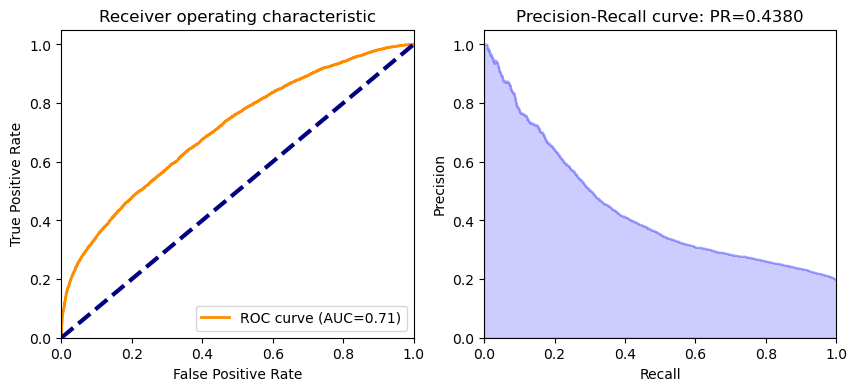

In [46]:
ROC_AUC(glm_v5,test_hex,'loan_default')

Both AUC (0.71) and PR (0.4380) are same as the model performance without regularization. The model performance keeps the same.

In [47]:
createGains(glm_v5)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1435,1765,3200,1435,1765,0.23,0.07,622.4,2.31,16.0,44.84
1,3200,999,2201,6400,2434,3966,0.39,0.15,1244.8,1.96,24.0,38.03
2,3200,479,2721,9600,2913,6687,0.47,0.26,1867.2,1.56,21.0,30.34
3,3200,453,2747,12800,3366,9434,0.54,0.37,2489.6,1.35,17.0,26.30
4,3200,470,2730,16000,3836,12164,0.62,0.47,3112.0,1.23,15.0,23.98
5,3200,465,2735,19200,4301,14899,0.69,0.58,3734.4,1.15,11.0,22.40
6,3200,515,2685,22400,4816,17584,0.77,0.68,4356.8,1.11,9.0,21.50
7,3200,482,2718,25600,5298,20302,0.85,0.79,4979.2,1.06,6.0,20.70
8,3200,481,2719,28800,5779,23021,0.93,0.89,5601.6,1.03,4.0,20.07


By comparing the cumulative lift between glm_v4 and glm_v5, the latter shows better performance, since most of the cumulative lifts are slightly larger. The model performance can be improved by activating regularization. Therefore, I will only use the model with regularization for coming iteration.

#### 2.3.2 alpha & lambda<a class="anchor" id="232"></a>

In GLM model, alpha and lambda are hyperparameters that control the level of regularization applied to the model. Regularization is a technique used to prevent overfitting, where the model performs well on the training data but fails to generalize to new, unseen data. Overfitting is a significant concern in loan prediction projects, as inaccurate predictions could lead to financial losses.

- Alpha: Alpha is the parameter that controls the balance between two types of regularization: L1 regularization (Lasso) and L2 regularization (Ridge). L1 regularization adds an absolute value penalty to the model's coefficients, encouraging some coefficients to be exactly zero, effectively performing feature selection. On the other hand, L2 regularization adds a squared value penalty to the coefficients, which shrinks them towards zero without setting any exactly to zero. The alpha hyperparameter allows us to tune the combination of these two regularization techniques.

- Lambda: Lambda is the regularization strength parameter. It determines the extent of regularization applied to the model. A higher lambda value corresponds to stronger regularization, and a lower lambda value reduces the regularization effect. Tuning lambda is essential because it helps us find the right amount of regularization to prevent overfitting while retaining the model's ability to capture important patterns in the data.

##### 2.3.2.1 Iterate Model <a class="anchor" id="2321"></a>

In [49]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

glm_v6 = H2OGeneralizedLinearEstimator(model_id='glm_v6', family="binomial", lambda_search=True, seed=1234)

# Define the hyperparameter grid for tuning
hyper_params = {
    'alpha': [0.1, 0.3, 0.4, 0.5, 0.6, 0.9],  # Regularization parameter (L1 regularization)
    'lambda': [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.01, 0.1]  # Regularization parameter (L2 regularization)
}

# Create the grid search object
grid = H2OGridSearch(model=glm_v6, hyper_params=hyper_params)

# Train the grid search with cross-validation
grid.train(x=predictors3, y=target, training_frame=train_hex)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,alpha,lambda,model_ids,logloss
,0.1,0.0001,Grid_GLM_Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex_model_python_1691034062705_6_model_1,0.4242583
,0.3,0.0001,Grid_GLM_Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex_model_python_1691034062705_6_model_2,0.4242598
,0.4,0.0001,Grid_GLM_Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex_model_python_1691034062705_6_model_3,0.4242609
,0.5,0.0001,Grid_GLM_Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex_model_python_1691034062705_6_model_4,0.4242622
,0.6,0.0001,Grid_GLM_Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex_model_python_1691034062705_6_model_5,0.4242637
,0.1,0.0005,Grid_GLM_Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex_model_python_1691034062705_6_model_7,0.4242667
,0.9,0.0001,Grid_GLM_Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex_model_python_1691034062705_6_model_6,0.4242680
,0.3,0.0005,Grid_GLM_Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex_model_python_1691034062705_6_model_8,0.4242802
,0.1,0.001,Grid_GLM_Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex_model_python_1691034062705_6_model_13,0.4242808
,0.4,0.0005,Grid_GLM_Key_Frame__upload_873b73a31353319c8bf9576c3fb54aab.hex_model_python_1691034062705_6_model_9,0.4242896


In [50]:
# Get the best GLM model from the grid search
glm_v6 = grid.get_grid()[0]

##### 2.3.2.2 Model Performance <a class="anchor" id="2322"></a>

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


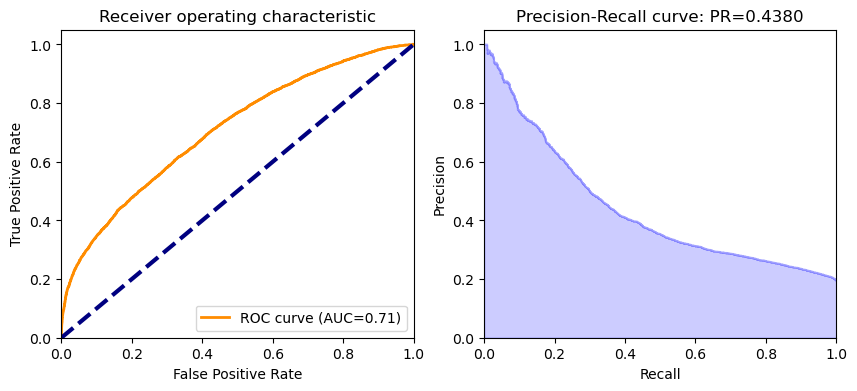

In [51]:
ROC_AUC(glm_v6,test_hex,'loan_default')

Both AUC (0.71) and PR (0.4380) are same as the model performance without hyperparameters tuning. The model performance keeps the same.

In [52]:
createGains(glm_v6)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1428,1772,3200,1428,1772,0.23,0.07,622.4,2.29,16.0,44.62
1,3200,999,2201,6400,2427,3973,0.39,0.15,1244.8,1.95,24.0,37.92
2,3200,486,2714,9600,2913,6687,0.47,0.26,1867.2,1.56,21.0,30.34
3,3200,455,2745,12800,3368,9432,0.54,0.37,2489.6,1.35,17.0,26.31
4,3200,461,2739,16000,3829,12171,0.62,0.47,3112.0,1.23,15.0,23.93
5,3200,470,2730,19200,4299,14901,0.69,0.58,3734.4,1.15,11.0,22.39
6,3200,511,2689,22400,4810,17590,0.77,0.68,4356.8,1.10,9.0,21.47
7,3200,493,2707,25600,5303,20297,0.85,0.79,4979.2,1.07,6.0,20.71
8,3200,466,2734,28800,5769,23031,0.93,0.89,5601.6,1.03,4.0,20.03


Tuning alpha and lambda slightly dereases the model performance, since the most of the cumulative lifts are slightly lower than before. There could be several reasons:
1. Suboptimal Hyperparameters: The performance of a GLM model is highly sensitive to the choice of alpha and lambda values. If the tuning process does not explore a wide enough range of hyperparameter values or the search space is limited, it might miss the optimal combination, leading to a slight decrease in performance.
2. Imbalanced Data: If the loan prediction dataset is imbalanced (i.e., the number of positive and negative samples differs significantly), regularization may have varying impacts on different classes, potentially affecting performance.

Since the new hyperparameters cannot improve the model performance, I will not include them for the next model iteration. However, the class imbalance issue can be solved by various sampling methods. I will explore oversampling in the next model iteration.

### 2.4 Oversampling <a class="anchor" id="24"></a>

Oversampling is a technique used in machine learning to address class imbalance in the dataset, particularly when one class (in this case, the minority class) is significantly underrepresented compared to the other class (majority class). In the context of a loan prediction project using GLM (Generalized Linear Model), oversampling involves artificially increasing the number of instances of the minority class by generating synthetic samples, thus balancing the class distribution.

Importance of Oversampling for GLM in Loan Prediction Project:

1. Correcting Class Imbalance: In loan prediction, the number of default cases is often much lower than non-default cases. This class imbalance can lead to biased model training, where the GLM model might favor the majority class, resulting in poor performance in predicting defaults. Oversampling helps to balance the class distribution, making the model more sensitive to the minority class.
2. Better Model Generalization: A balanced dataset improves the generalization ability of the GLM model. By presenting more examples of the minority class during training, the model becomes more robust and better able to recognize patterns and features associated with defaults.
3. Reducing Bias: Without oversampling, the GLM model might struggle to learn from the limited number of default cases, leading to a biased decision boundary. Oversampling provides more data points for the minority class, reducing the bias in the model's predictions.
4. Increased Recall: In a loan prediction project, identifying default cases is of critical importance. Oversampling increases the recall (true positive rate) of the model, allowing it to capture more true default cases and reducing the risk of missing high-risk loans.
5. Improved Model Performance: By balancing the class distribution, the GLM model's overall performance metrics, such as accuracy, precision, recall, and F1-score, are likely to improve, leading to more reliable loan default predictions.

#### 2.4.1 Iterate Model <a class="anchor" id="241"></a>

In [53]:
df1 = pd.concat([train,test])

In [54]:
y = df1[target]
X = df1.drop(target,axis=1)
y.dtypes

dtype('int64')

In [55]:
y1_cnt = df1[target].count()
y0_cnt = y1_cnt * 2

In [56]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(sampling_strategy={1: y1_cnt, 0: y0_cnt})
X_rs, y_rs = sampler.fit_resample(X, y)

In [57]:
X_rs = pd.DataFrame(X_rs)
y_rs = pd.DataFrame(y_rs) 
y_rs = df1[df1[target]==1]
X_rs = df1[df1[target]==0].sample(n=y0_cnt, replace=True)
smpl = pd.concat([X_rs,y_rs])
smpl_hex = h2o.H2OFrame(smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [58]:
# Build GLM model with regularization after oversampling
glm_v7 = H2OGeneralizedLinearEstimator(model_id = 'glm_v7',
                                       family= "binomial",
                                       lambda_search = True,
                                       seed=1234)
glm_v7.train(predictors3, target, training_frame=smpl_hex)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm_v7


GLM Model: summary
    family    link    regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.001163 )  nlambda = 100, lambda.max = 0.1337, lambda.min = 0.001163, lambda.1se = -1.0  39                            33                             76                      Key_Frame__upload_a822f8a877ccabb856b4ab1a1abf4991.hex

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.07185443167132158
RMSE: 0.2680567694935563
LogLoss: 0.2640052969643445
AUC: 0.7185508799150956
AUCPR: 0.30440486963894153
Gini: 0.43710175983019117
Null degrees of freedom: 175487
Residual degrees of freedom: 175454
Null deviance: 104761.39079483616
Residual deviance: 92659.52310735777
AIC: 92727.52310735777

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1886283048298397
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      149834  10166  0.0635   (10166.0/160000.0)
1      10547   4941   0.681    (10547.0/15488.0)
Total  160381  15107  0.118    (20713.0/175488.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.188628     0.322994  187
max f2                       0.0720453    0.391922  299
max f0point5                 0.305658     0.3813    124
max accuracy                 0.437141     0.916889  77
max precision                0.948125     1         0
max recall                   0.00577837   1         397
max specificity              0.948125     1         0
max absolute_mcc             0.305658     0.274335  124
max min_per_class_accuracy   0.0771152    0.644881  292
max mean_per_class_accuracy  0.0945085    0.651262  268
max tns                      0.948125     160000    0
max fns                      0.948125     15487     0
max fps                      0.00367254   160000    399
max tps                      0.00577837   15488     397
max tnr                      0.948125     1         0
max fnr                      0.948125     0.999935  0
max fpr                      0.00367254   1         399
max tpr                      0.00577837   1         397

Gains/Lift Table: Avg response rate:  8.83 %, avg score:  8.83 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100007                   0.460527           8.39302   8.39302            0.740741         0.584123   0.740741                    0.584123            0.083936        0.083936                   739.302   739.302            0.0810922
2        0.0200014                   0.369376           5.1262    6.75961            0.452422         0.409723   0.596581                    0.496923            0.0512655       0.135201                   412.62    575.961            0.126351
3        0.0300021                   0.319237           4.2869    5.93537            0.378348         0.341845   0.523837              

#### 2.4.2 Model Performance <a class="anchor" id="242"></a>

After conducting oversampling, the model's performance has improved compared to the previous model.

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


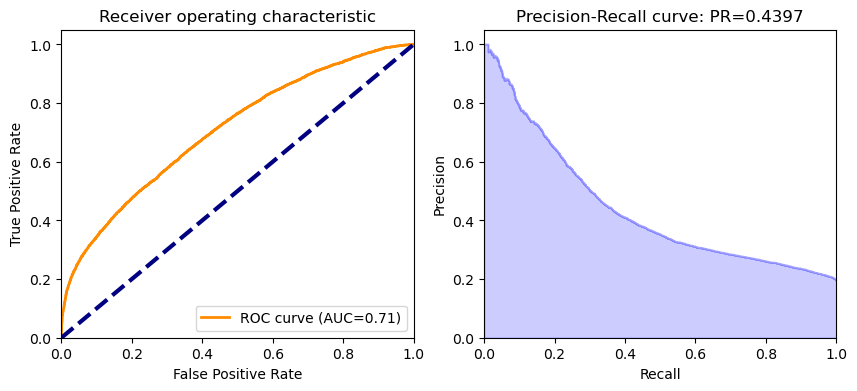

In [61]:
ROC_AUC(glm_v7,test_hex,'loan_default')

AUC (Area Under the Curve): The AUC value of 0.71 indicates that the model's discriminatory power keeps the same. An AUC of 0.71 means that the model's ability to correctly rank loan default probabilities is quite good.

PR (Precision-Recall): The PR value of 0.4397 (0.4397 > 0.4380) indicates that the model's precision-recall trade-off has also improved. The model is now achieving a higher precision while maintaining good recall. A PR value of 0.4397 suggests that the model is better at identifying actual loan defaults while reducing false positives.

In [62]:
createGains(glm_v7)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1698,1502,3200,1698,1502,0.27,0.06,622.4,2.73,21.0,53.06
1,3200,497,2703,6400,2195,4205,0.35,0.16,1244.8,1.76,19.0,34.30
2,3200,497,2703,9600,2692,6908,0.43,0.27,1867.2,1.44,16.0,28.04
3,3200,516,2684,12800,3208,9592,0.52,0.37,2489.6,1.29,15.0,25.06
4,3200,488,2712,16000,3696,12304,0.59,0.48,3112.0,1.19,11.0,23.10
5,3200,501,2699,19200,4197,15003,0.67,0.58,3734.4,1.12,9.0,21.86
6,3200,543,2657,22400,4740,17660,0.76,0.69,4356.8,1.09,7.0,21.16
7,3200,509,2691,25600,5249,20351,0.84,0.79,4979.2,1.05,5.0,20.50
8,3200,484,2716,28800,5733,23067,0.92,0.89,5601.6,1.02,3.0,19.91


Gains Table: The gains table provides detailed insights into the model's performance at different deciles. Each decile represents a grouping of samples based on their predicted probabilities.

Interpretation:

The gains table shows that the new model outperforms the previous one. The lift values are consistently higher, indicating that the model is performing much better than random guessing. The K-S values are also higher, showing improved discriminatory power between actual and non-actual groups.

Moreover, the gain values are higher across all deciles, indicating that the model is better at capturing loan defaults compared to the previous model. For example, at the 10th decile, the model captures 53.06% of the total defaults, whereas the previous model captured only 44.84% at the same decile.

Overall, the new model shows slight improvement in both AUC and PR, indicating that it has better predictive performance and is more effective in identifying loan defaults while maintaining higher precision. This model is likely to be more reliable for loan default prediction and can potentially help in making better lending decisions.

## 3. AutoML (Automated Machine Learning) <a class="anchor" id="3"></a>

AutoML (Automated Machine Learning) is suitable for a loan prediction project for several reasons:

1. Efficiency: Loan prediction projects often involve exploring and testing various machine learning algorithms and hyperparameters. AutoML automates this process, saving time and effort in model selection and hyperparameter tuning.

2. Model Selection: AutoML can automatically select the most appropriate machine learning algorithms for the loan prediction task, considering both linear and nonlinear relationships in the data.

3. Hyperparameter Tuning: AutoML optimizes hyperparameters for the selected algorithms, ensuring the models are fine-tuned for the loan prediction problem, leading to improved performance.

4. Feature Engineering: AutoML can handle feature engineering tasks, such as missing value imputation, one-hot encoding, and scaling, which are essential for preparing the data for modeling.

5. Ensemble Methods: AutoML often employs ensemble methods that combine multiple models to achieve better predictive accuracy, reducing the risk of overfitting and enhancing model performance.

6. Model Interpretability: Some AutoML tools provide insights into the model's decision-making process, helping to understand which features are most influential in loan prediction.

7. Reproducibility: AutoML ensures that the model-building process is reproducible, allowing for easy comparison of different models and tracking experiments.

8. No Expertise Required: AutoML does not require the user to be an expert in machine learning, making it accessible to a wider range of users, including business analysts and domain experts.

Overall, AutoML streamlines the machine learning pipeline, enabling quicker model development, increased accuracy, and facilitating the deployment of more reliable and efficient loan prediction models.

### 3.1 Build Model (Raw Variables) <a class="anchor" id="31"></a>

In [63]:
# Build autoML model with all the original variables
from h2o.automl import H2OAutoML
aml_v1 = H2OAutoML(max_models=10, seed=1)
aml_v1.train(x=predictors, y=target, training_frame=train_hex)

AutoML progress: |
23:46:34.316: AutoML: XGBoost is not available; skipping it.
23:46:34.329: _train param, Dropping bad and constant columns: [TD029, TD028, TD027, TD026, TD025, CR012]
23:46:34.330: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


23:46:35.933: _train param, Dropping bad and constant columns: [CR012]
23:46:35.933: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████
23:46:42.42: _train param, Dropping bad and constant columns: [CR012]
23:46:42.42: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to

key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/10
# GBM base models (used / total),5/6
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),2/2
# DRF base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [65]:
# View the AutoML Leaderboard
lb1 = aml_v1.leaderboard
lb1.head(rows=lb1.nrows)  

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230802_234634,0.381129,0.145259,0.291743,0.267249,0.145259
StackedEnsemble_BestOfFamily_1_AutoML_1_20230802_234634,0.381389,0.145457,0.29228,0.267434,0.145457
GBM_2_AutoML_1_20230802_234634,0.38199,0.145917,0.292085,0.267883,0.145917
GBM_5_AutoML_1_20230802_234634,0.382108,0.146006,0.291994,0.267895,0.146006
GBM_1_AutoML_1_20230802_234634,0.38265,0.146421,0.292082,0.268604,0.146421
GBM_3_AutoML_1_20230802_234634,0.382943,0.146645,0.292358,0.268597,0.146645
GLM_1_AutoML_1_20230802_234634,0.383134,0.146792,0.295682,0.269106,0.146792
GBM_4_AutoML_1_20230802_234634,0.383762,0.147273,0.291996,0.269393,0.147273
DeepLearning_1_AutoML_1_20230802_234634,0.385194,0.148375,0.295734,0.270807,0.148375
DRF_1_AutoML_1_20230802_234634,0.387493,0.150151,0.298664,0.274513,0.150151


#### 3.1.1 Model Performance <a class="anchor" id="311"></a>

In loan default prediction, the model's performance is evaluated using different metrics, such as AUC (Area Under the Receiver Operating Characteristic Curve), PR (Precision-Recall), and Gains Table.

In [66]:
# Update the function to generate ROC and PR curve for AutoML model
def ROC_AUC(my_result, df, target):
    from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve
    import matplotlib.pyplot as plt

    # Get the probabilities for the positive class (class 1)
    y_actual = df[target].as_data_frame()
    y_pred_prob = my_result.predict(df).as_data_frame()['predict']  # Assuming the positive class probability column is named 'p1'

    # Convert probabilities to binary predictions (0 or 1)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_actual, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Compute Precision-Recall curve and PR value
    precision, recall, _ = precision_recall_curve(y_actual, y_pred_prob)
    average_precision = average_precision_score(y_actual, y_pred_prob)

    # Plotting
    plt.figure(figsize=(10, 4))
    # ROC
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC=%0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1, 2, 2)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


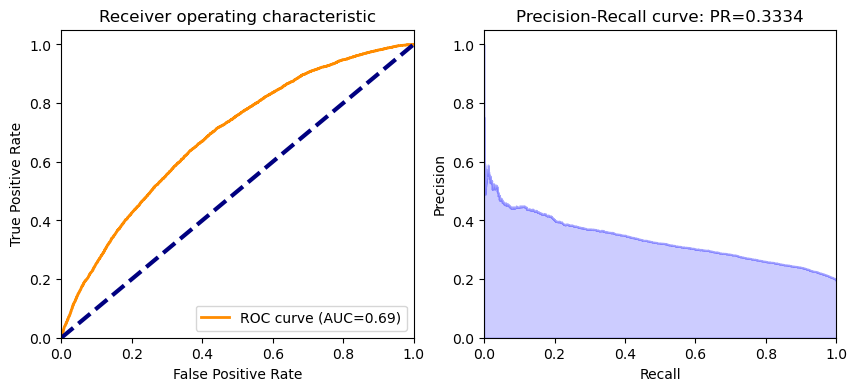

In [67]:
ROC_AUC(aml_v1.leader,test_hex,'loan_default')

AUC (Area Under the Curve): AUC is a popular metric for evaluating binary classification models. It measures the model's ability to distinguish between positive and negative samples. An AUC value of 0.69 indicates that the model has moderate discriminatory power, but there is room for improvement. The AUC ranges from 0 to 1, where 0.5 represents random guessing, and 1 represents a perfect classifier.

PR (Precision-Recall): PR is another metric used for binary classification, especially when dealing with imbalanced datasets. It focuses on the trade-off between precision (positive predictive value) and recall (sensitivity or true positive rate). The PR value of 0.3334 indicates that the model's precision is relatively low compared to its recall. This means that while the model can identify a good proportion of actual loan defaults (high recall), it may also produce a considerable number of false positives (low precision).

In [68]:
createGains(aml_v1.leader)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1270,1930,3200,1270,1930,0.20,0.07,622.4,2.04,13.0,39.69
1,3200,1013,2187,6400,2283,4117,0.37,0.16,1244.8,1.83,21.0,35.67
2,3200,809,2391,9600,3092,6508,0.50,0.25,1867.2,1.66,25.0,32.21
3,3200,742,2458,12800,3834,8966,0.62,0.35,2489.6,1.54,27.0,29.95
4,3200,636,2564,16000,4470,11530,0.72,0.45,3112.0,1.44,27.0,27.94
5,3200,506,2694,19200,4976,14224,0.80,0.55,3734.4,1.33,25.0,25.92
6,3200,468,2732,22400,5444,16956,0.87,0.66,4356.8,1.25,21.0,24.30
7,3200,358,2842,25600,5802,19798,0.93,0.77,4979.2,1.17,16.0,22.66
8,3200,269,2931,28800,6071,22729,0.98,0.88,5601.6,1.08,10.0,21.08


Gains Table:

The gains table provides additional insights into how the model performs across different deciles. A decile represents a grouping of samples based on their predicted probabilities. The gains table shows the cumulative count of actual and non-actual (predicted) loan defaults for each decile, along with various evaluation metrics.

Key Metrics in the Gains Table:

Cumulative Actual: Cumulative count of actual loan defaults observed in each decile.
Cumulative Non-Actual: Cumulative count of non-defaults observed in each decile.
Percent Cumulative Actual: Percentage of cumulative actual loan defaults relative to the total number of actual loan defaults.
Percent Cumulative Non-Actual: Percentage of cumulative non-defaults relative to the total number of non-defaults.
Lift: Lift measures how many times better the model performs compared to a random model. It is calculated as the ratio of the percent cumulative actual to the percent cumulative non-actual.
K-S: The Kolmogorov-Smirnov statistic measures the maximum distance between the cumulative distribution functions of the actual and non-actual groups. It is a measure of the model's discriminatory power.
Gain: The gain is the cumulative percentage of actual loan defaults at each decile. It shows how much of the total default population is captured at each decile.
Interpretation:

From the gains table, we can observe the model's performance at different deciles. The higher the decile, the higher the predicted probabilities of loan default. The gain and lift metrics show how much better the model is performing compared to random selection at each decile. The K-S metric indicates the maximum difference in cumulative percentages between actual and non-actual groups.

Overall, the model seems to perform reasonably well in identifying loan defaults, especially in higher deciles, where the gain is relatively higher. However, there is still room for improvement, especially in terms of precision (PR) and discriminatory power (AUC). Further analysis and model tuning may help improve the model's performance.

### 3.2 Feature Engineering <a class="anchor" id="32"></a>

I will reuse the selected features after feature engineering to iterate the autoML model.

#### 3.2.1 Iterate Model <a class="anchor" id="321"></a>

In [69]:
# Build autoML model with the new variables after above feature engineering
aml_v2 = H2OAutoML(max_models=10, seed=1)
aml_v2.train(x=predictors3, y=target, training_frame=train_hex)

AutoML progress: |
23:53:15.627: AutoML: XGBoost is not available; skipping it.
23:53:15.631: _train param, Dropping bad and constant columns: [TD048_bin_WOE, TD055_bin_WOE, TD062_bin_WOE, AP002_bin_WOE]
23:53:15.631: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


23:53:16.718: _train param, Dropping bad and constant columns: [TD048_bin_WOE, TD055_bin_WOE, TD062_bin_WOE, AP002_bin_WOE]
23:53:16.718: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████
23:53:22.256: _train param, Dropping bad and constant columns: [TD048_bin_WOE, TD055_bin_WOE, TD062_bin_WOE, AP002_bin_WOE]
23:53:22.256: _response param, We have detected that your response column ha

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),5/6
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [71]:
# View the AutoML Leaderboard
lb2 = aml_v2.leaderboard
lb2.head(rows=lb2.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20230802_235315,0.347497,0.120754,0.244259,0.243526,0.120754
StackedEnsemble_BestOfFamily_1_AutoML_2_20230802_235315,0.347813,0.120974,0.244965,0.243783,0.120974
GBM_5_AutoML_2_20230802_235315,0.34824,0.121271,0.247074,0.244146,0.121271
GBM_2_AutoML_2_20230802_235315,0.348461,0.121425,0.24586,0.24436,0.121425
GBM_3_AutoML_2_20230802_235315,0.348917,0.121743,0.245591,0.24461,0.121743
GBM_1_AutoML_2_20230802_235315,0.349158,0.121911,0.245787,0.245096,0.121911
GBM_4_AutoML_2_20230802_235315,0.350385,0.122769,0.246171,0.245859,0.122769
DeepLearning_1_AutoML_2_20230802_235315,0.352463,0.12423,0.239465,0.245793,0.12423
XRT_1_AutoML_2_20230802_235315,0.352749,0.124432,0.250488,0.248984,0.124432
DRF_1_AutoML_2_20230802_235315,0.353125,0.124697,0.250582,0.249483,0.124697


#### 3.2.2 Model Performance <a class="anchor" id="322"></a>

With the above feature engineering, the model's performance has significantly improved compared to the previous model.

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


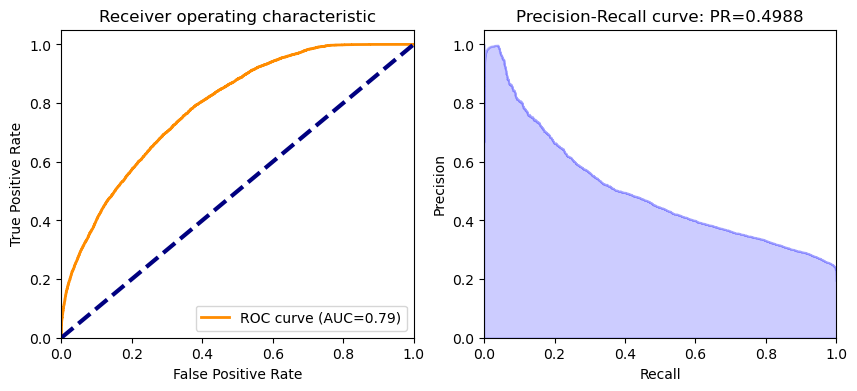

In [72]:
ROC_AUC(aml_v2.leader,test_hex,'loan_default')

AUC (Area Under the Curve): The AUC value of 0.79 (0.79 > 0.69) indicates that the model's discriminatory power has substantially increased. A higher AUC value suggests that the model is better at distinguishing between positive and negative samples. An AUC of 0.6846 means that the model's ability to correctly rank loan default probabilities is quite good.

PR (Precision-Recall): The PR value of 0.4988 (0.4988 > 0.3334) indicates that the model's precision-recall trade-off has also improved. The model is now achieving a higher precision while maintaining good recall. A PR value of 0.4988 suggests that the model is better at identifying actual loan defaults while reducing false positives.

In [73]:
createGains(aml_v2.leader)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1820,1380,3200,1820,1380,0.29,0.05,622.4,2.92,24.0,56.88
1,3200,1122,2078,6400,2942,3458,0.47,0.13,1244.8,2.36,34.0,45.97
2,3200,836,2364,9600,3778,5822,0.61,0.23,1867.2,2.02,38.0,39.35
3,3200,746,2454,12800,4524,8276,0.73,0.32,2489.6,1.82,41.0,35.34
4,3200,602,2598,16000,5126,10874,0.82,0.42,3112.0,1.65,40.0,32.04
5,3200,481,2719,19200,5607,13593,0.90,0.53,3734.4,1.50,37.0,29.20
6,3200,353,2847,22400,5960,16440,0.96,0.64,4356.8,1.37,32.0,26.61
7,3200,235,2965,25600,6195,19405,1.00,0.75,4979.2,1.24,25.0,24.20
8,3200,28,3172,28800,6223,22577,1.00,0.88,5601.6,1.11,12.0,21.61


Gains Table: The gains table provides detailed insights into the model's performance at different deciles. Each decile represents a grouping of samples based on their predicted probabilities.

Interpretation:

The gains table shows that the new model significantly outperforms the previous one. The lift values are consistently higher, indicating that the model is performing much better than random guessing. The K-S values are also higher, showing improved discriminatory power between actual and non-actual groups.

Moreover, the gain values are higher across all deciles, indicating that the model is better at capturing loan defaults compared to the previous model. For example, at the 10th decile, the model captures 56.88% of the total defaults, whereas the previous model captured only 39.69% at the same decile.

Overall, the new model shows marked improvement in both AUC and PR, indicating that it has better predictive performance and is more effective in identifying loan defaults while maintaining higher precision. This model is likely to be more reliable for loan default prediction and can potentially help in making better lending decisions.

### 3.3 Hyperparameter Tuning (max_models, stopping_metric, nfolds, balance_classes) <a class="anchor" id="33"></a>

I am going to tune these hyperparameters for AutoML model iteration: 
1. max_models: max_models is a hyperparameter that specifies the maximum number of models that AutoML will build. Setting a proper value for max_models helps to limit the number of models generated during the search process. Too large a value may result in excessive computation time, while too small a value may limit the diversity of models explored, potentially missing out on better-performing models.

2. stopping_metric: stopping_metric is the metric used to determine when to stop the model training process early if performance improvement is not significant. Common stopping metrics include AUC (Area Under the ROC Curve), logloss, and MSE (Mean Squared Error). By choosing an appropriate stopping metric, AutoML can terminate the training of models that are unlikely to yield significant improvements, thereby saving time and computational resources.

3. nfolds: nfolds determines the number of folds used in cross-validation during model training. Cross-validation is crucial to estimate the model's generalization performance and reduce overfitting. Specifying a reasonable number of folds allows AutoML to obtain a more robust estimate of the model's performance on unseen data.

4. balance_classes: In a loan prediction project, the class distribution is often imbalanced, with default cases being a minority compared to non-default cases. Setting balance_classes=True in AutoML ensures that the training data is balanced by oversampling the minority class. This helps the models to better learn patterns associated with the minority class, leading to improved performance in predicting loan defaults.

Tuning these hyperparameters is essential for AutoML in a loan prediction project to achieve the following:

1. Improve model performance: By tuning these hyperparameters, AutoML can explore different combinations and variations of models, leading to better performance on the evaluation metric of interest (e.g., AUC, accuracy, or F1-score).

2. Optimize resource utilization: Properly setting hyperparameters like max_models and stopping_metric can prevent excessive model building and early stopping, saving computational resources and time.

3. Address class imbalance: Tuning balance_classes helps to handle class imbalance, enabling the models to give more attention to the minority class and make better predictions for loan defaults.

Overall, tuning these hyperparameters allows AutoML to efficiently explore the model space, enhance model performance, and generate a well-performing model for loan prediction tasks.

#### 3.3.1 Iterate Model <a class="anchor" id="331"></a>

In [94]:
# Set hyperparameters and train autoML model
aml_v3 = H2OAutoML(max_models=20, stopping_metric='MSE', nfolds=5, balance_classes=True, seed=1)
aml_v3.train(x=predictors3, y=target, training_frame=train_hex)

AutoML progress: |
16:38:27.584: AutoML: XGBoost is not available; skipping it.
16:38:27.586: _train param, Dropping bad and constant columns: [TD048_bin_WOE, TD055_bin_WOE, TD062_bin_WOE, AP002_bin_WOE]
16:38:27.586: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


16:38:28.224: _train param, Dropping bad and constant columns: [TD048_bin_WOE, TD055_bin_WOE, TD062_bin_WOE, AP002_bin_WOE]
16:38:28.224: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████
16:38:34.610: _train param, Dropping bad and constant columns: [TD048_bin_WOE, TD055_bin_WOE, TD062_bin_WOE, AP002_bin_WOE]
16:38:34.610: _response param, We have detected that your response column ha

key,value
Stacking strategy,cross_validation
Number of base models (used / total),17/28
# GBM base models (used / total),16/25
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [95]:
# View the AutoML Leaderboard
lb3 = aml_v3.leaderboard
lb3.head(rows=lb3.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_11_20230803_163827,0.347427,0.120705,0.246352,0.243704,0.120705
StackedEnsemble_BestOfFamily_1_AutoML_11_20230803_163827,0.348107,0.121178,0.245669,0.244101,0.121178
GBM_5_AutoML_11_20230803_163827,0.34824,0.121271,0.247074,0.244146,0.121271
GBM_grid_1_AutoML_11_20230803_163827_model_2,0.348289,0.121305,0.249861,0.244166,0.121305
GBM_2_AutoML_11_20230803_163827,0.348461,0.121425,0.24586,0.24436,0.121425
GBM_grid_1_AutoML_11_20230803_163827_model_22,0.348511,0.12146,0.250586,0.244341,0.12146
GBM_grid_1_AutoML_11_20230803_163827_model_11,0.348542,0.121481,0.249531,0.24456,0.121481
GBM_grid_1_AutoML_11_20230803_163827_model_17,0.348656,0.121561,0.245839,0.244448,0.121561
GBM_grid_1_AutoML_11_20230803_163827_model_3,0.348672,0.121572,0.249431,0.244555,0.121572
GBM_grid_1_AutoML_11_20230803_163827_model_14,0.348692,0.121586,0.25064,0.244532,0.121586


#### 3.3.2 Model Performance <a class="anchor" id="332"></a>

After conducting Hyperparameter Tuning, the model's performance has slightly improved compared to the previous model.

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


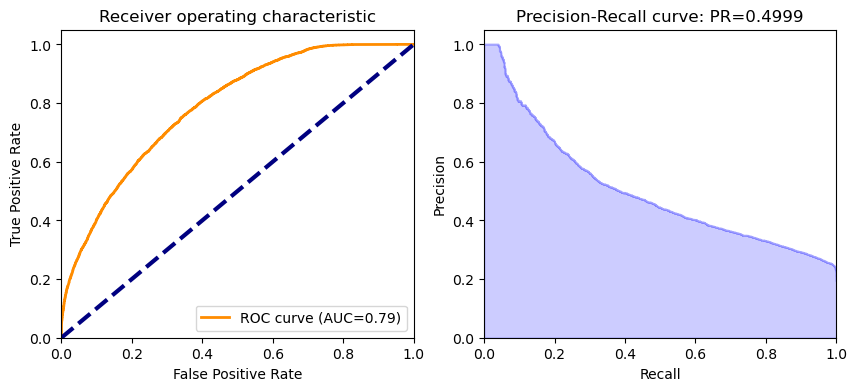

In [96]:
ROC_AUC(aml_v3.leader,test_hex,'loan_default')

AUC (0.79) is same as the model performance without hyperparameters tuning, but PR (0.4999 > 0.4988) is increased than before. The model performance slightly improved.

In [97]:
createGains(aml_v3.leader)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,1819,1381,3200,1819,1381,0.29,0.05,622.4,2.92,24.0,56.84
1,3200,1127,2073,6400,2946,3454,0.47,0.13,1244.8,2.37,34.0,46.03
2,3200,860,2340,9600,3806,5794,0.61,0.22,1867.2,2.04,39.0,39.65
3,3200,720,2480,12800,4526,8274,0.73,0.32,2489.6,1.82,41.0,35.36
4,3200,598,2602,16000,5124,10876,0.82,0.42,3112.0,1.65,40.0,32.02
5,3200,475,2725,19200,5599,13601,0.90,0.53,3734.4,1.50,37.0,29.16
6,3200,362,2838,22400,5961,16439,0.96,0.64,4356.8,1.37,32.0,26.61
7,3200,232,2968,25600,6193,19407,1.00,0.75,4979.2,1.24,25.0,24.19
8,3200,29,3171,28800,6222,22578,1.00,0.88,5601.6,1.11,12.0,21.60


By comparing the cumulative lift between aml_v2 and aml_v3, the latter shows better performance, since most of the cumulative lifts are slightly larger. The model performance can be improved by this hyperparameters tuning. 

## 4. Conclusion<a class="anchor" id="4"></a>

Comparing the performance of the models across feature engineering, hyperparameters tuning and sampling methods, we can see all of them can significantly improve the model's accuracy and stability. Feature engineering handled the special values and captured the informative patterns for modeling. Sampling methods handle the class imbalance issue of this loan prediction project. Hyperparameters tuning tested a range of hyperparameters' different values and selected the hyperparameters that can achieve better model performance, but its effect is the most trivial in this project. Therefore, the data quality itself can be more important than modeling techniques while considering to improve the prediction accuracy. 

Comparing the performance of GML and AutoML model, the AutoML model outperformed the GLM model for this loan prediction project. There could be several reasons:

1. Model Selection: AutoML explores a wide range of algorithms and model configurations, including GLM, along with other powerful models such as Random Forest, Gradient Boosting Machines (GBM), Deep Learning, etc. It automatically selects the best-performing model based on the data and the target metric, which could result in a better-performing model than manually choosing GLM.

2. Complex Relationships: Loan default prediction is a complex task that involves various factors contributing to the likelihood of default. AutoML is capable of handling complex relationships and interactions among features, which could lead to more accurate predictions compared to a simpler GLM model.

3. Hyperparameter Tuning: AutoML performs extensive hyperparameter tuning for each model, optimizing their configurations for better performance. This automated tuning process can result in models with better generalization and prediction capabilities.

4. Ensembling: AutoML often uses ensemble techniques that combine multiple models to leverage their strengths and mitigate individual model weaknesses. Ensembling can improve model robustness and reduce overfitting, which is crucial in a loan prediction project.

5. Computational Power: AutoML can utilize more computational resources and time compared to manually fitting a single GLM model, allowing it to explore a larger search space and find more optimal models.

In summary, AutoML's ability to automatically explore a wide range of models, hyperparameter configurations, and perform ensembling makes it a powerful tool for achieving superior performance in loan prediction projects compared to a single GLM model. However, it's essential to interpret and validate the results carefully to ensure the model's performance is genuinely beneficial.